In [2]:
%matplotlib widget

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from scipy.ndimage import zoom, gaussian_filter
import seaborn as sns
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter as gf
from split_dataset import SplitDataset

from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform2D,
                                   RigidTransform2D,
                                   AffineTransform2D)

In [19]:
path = Path(r"E:\anatomies_poa_ot_pre_post")
pre_path = list((path / "poa_pre").glob("*"))
post_path = list((path / "poa_post").glob("*"))
postpost_path = list((path / "poa_postpost").glob("*"))

In [28]:
np.array(SplitDataset(p/"original"))

array(<split_dataset.split_dataset.SplitDataset object at 0x00000222E3431AC8>,
      dtype=object)

In [34]:
imgs_pre = []
for p in pre_path:
    try:
        img = SplitDataset(p/"original")[:,:,:,:].mean(0).sum(0)
        img = img / np.nansum(img)
        imgs_pre.append(img)
    except:
        print("mmm")

mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm
mmm


In [40]:
reference = imgs_pre[1].copy()
t_anatomies_pre = []
for n in tqdm(range(len(imgs_pre))):
    nbins = 32
    sampling_prop = None
    metric = MutualInformationMetric(nbins, sampling_prop)
    level_iters = [10000, 1000, 100]
    sigmas = [3.0, 1.0, 0.0]
    factors = [4, 2, 1]
    affreg = AffineRegistration(metric=metric,
                                level_iters=level_iters,
                                sigmas=sigmas,
                                factors=factors)
    transform = AffineTransform2D()
    params = None
    affine = affreg.optimize(reference, imgs_pre[n], transform, params)
    transformed = affine.transform(imgs_pre[n])
    t_anatomies_pre.append(transformed)

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


  8%|██████▍                                                                            | 1/13 [00:05<01:05,  5.43s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 15%|████████████▊                                                                      | 2/13 [00:10<00:55,  5.04s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 23%|███████████████████▏                                                               | 3/13 [00:15<00:52,  5.30s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 31%|█████████████████████████▌                                                         | 4/13 [00:20<00:46,  5.12s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 38%|███████████████████████████████▉                                                   | 5/13 [00:27<00:45,  5.71s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 46%|██████████████████████████████████████▎                                            | 6/13 [00:34<00:42,  6.04s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:40<00:36,  6.03s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 62%|███████████████████████████████████████████████████                                | 8/13 [00:46<00:30,  6.13s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:58<00:32,  8.09s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [01:09<00:26,  8.95s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [01:15<00:15,  7.90s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [01:22<00:07,  7.59s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:29<00:00,  6.87s/it]


In [39]:
np.stack(t_anatomies_pre).shape

(13, 13, 437, 437)

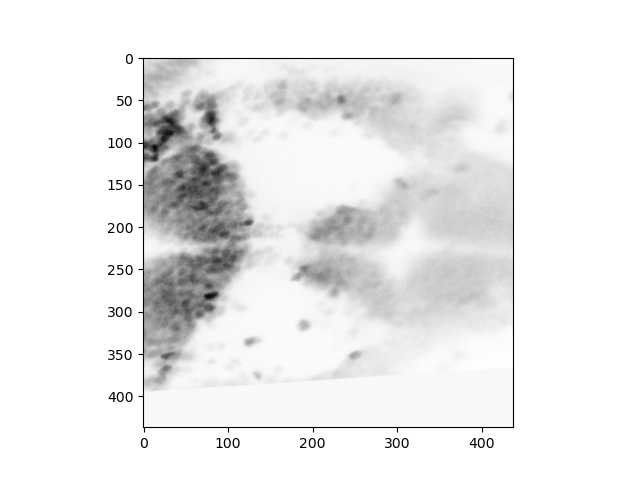

In [52]:
plt.figure()
plt.imshow(t_anatomies_pre[4],cmap="gray_r")
plt.show()

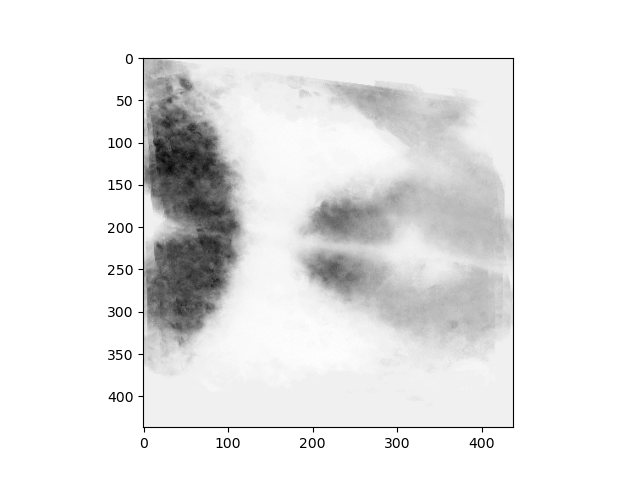

In [53]:
plt.figure()
plt.imshow(np.nanmedian(np.stack(t_anatomies_pre),0),cmap="gray_r")
plt.show()

In [43]:
imgs_post = []
for p in post_path:
    try:
        img = SplitDataset(p)[:,:,:,:].mean(0).sum(0)
        img = img / np.nansum(img)
        imgs_post.append(img)
    except:
        print("mmm")

mmm
mmm
mmm
mmm


In [47]:
reference = imgs_post[0].copy()
t_anatomies_post = []
for n in tqdm(range(len(imgs_post))):
    nbins = 32
    sampling_prop = None
    metric = MutualInformationMetric(nbins, sampling_prop)
    level_iters = [10000, 1000, 100]
    sigmas = [3.0, 1.0, 0.0]
    factors = [4, 2, 1]
    affreg = AffineRegistration(metric=metric,
                                level_iters=level_iters,
                                sigmas=sigmas,
                                factors=factors)
    transform = AffineTransform2D()
    params = None
    affine = affreg.optimize(reference, imgs_post[n], transform, params)
    transformed = affine.transform(imgs_post[n])
    t_anatomies_post.append(transformed)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


  5%|████▏                                                                              | 1/20 [00:04<01:30,  4.76s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 10%|████████▎                                                                          | 2/20 [00:10<01:37,  5.42s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 15%|████████████▍                                                                      | 3/20 [00:27<02:59, 10.53s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 20%|████████████████▌                                                                  | 4/20 [00:40<03:07, 11.69s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 25%|████████████████████▊                                                              | 5/20 [00:46<02:25,  9.68s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 30%|████████████████████████▉                                                          | 6/20 [00:54<02:04,  8.87s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 35%|█████████████████████████████                                                      | 7/20 [01:00<01:45,  8.08s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 40%|█████████████████████████████████▏                                                 | 8/20 [01:11<01:49,  9.12s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 45%|█████████████████████████████████████▎                                             | 9/20 [01:22<01:44,  9.50s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 50%|█████████████████████████████████████████                                         | 10/20 [01:27<01:23,  8.32s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 55%|█████████████████████████████████████████████                                     | 11/20 [01:34<01:09,  7.72s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 60%|█████████████████████████████████████████████████▏                                | 12/20 [01:40<00:57,  7.23s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [01:47<00:49,  7.07s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:52<00:38,  6.46s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [01:57<00:30,  6.16s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [02:13<00:36,  9.14s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [02:26<00:31, 10.36s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [02:34<00:18,  9.44s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [02:39<00:08,  8.18s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:44<00:00,  8.25s/it]


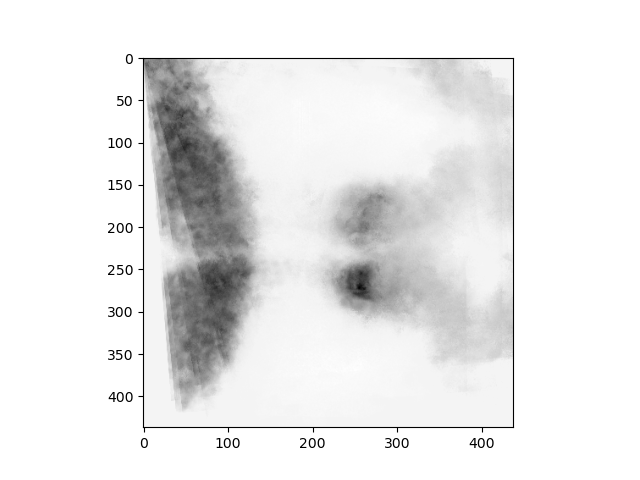

In [54]:
plt.figure()
plt.imshow(np.nanmedian(np.stack(t_anatomies_post),0),cmap="gray_r")
plt.show()

In [55]:
imgs_postpost = []
for p in postpost_path:
    try:
        img = SplitDataset(p)[:,:,:,:].mean(0).sum(0)
        img = img / np.nansum(img)
        imgs_postpost.append(img)
    except:
        print("mmm")

In [73]:
reference = imgs_postpost[6].copy()
t_anatomies_postpost = []
for n in tqdm(range(len(imgs_postpost))):
    nbins = 32
    sampling_prop = None
    metric = MutualInformationMetric(nbins, sampling_prop)
    level_iters = [10000, 1000, 100]
    sigmas = [3.0, 1.0, 0.0]
    factors = [4, 2, 1]
    affreg = AffineRegistration(metric=metric,
                                level_iters=level_iters,
                                sigmas=sigmas,
                                factors=factors)
    transform = TranslationTransform2D()
    params = None
    affine = affreg.optimize(reference, imgs_postpost[n], transform, params)
    transformed = affine.transform(imgs_postpost[n])
    t_anatomies_postpost.append(transformed)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 11%|█████████▎                                                                          | 1/9 [00:05<00:42,  5.28s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 22%|██████████████████▋                                                                 | 2/9 [00:06<00:20,  2.89s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 33%|████████████████████████████                                                        | 3/9 [00:09<00:18,  3.08s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 44%|█████████████████████████████████████▎                                              | 4/9 [00:12<00:15,  3.02s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:16<00:13,  3.33s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:19<00:09,  3.09s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:21<00:05,  2.74s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:24<00:02,  2.98s/it]

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:26<00:00,  3.00s/it]


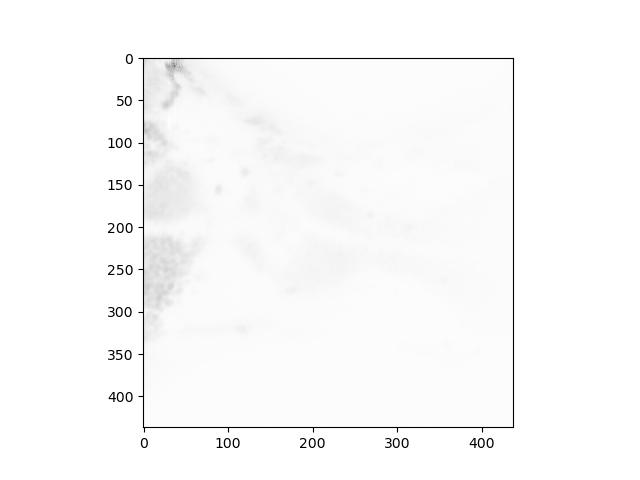

In [159]:
plt.figure()
plt.imshow(imgs_postpost[5],cmap="gray_r")
plt.show()

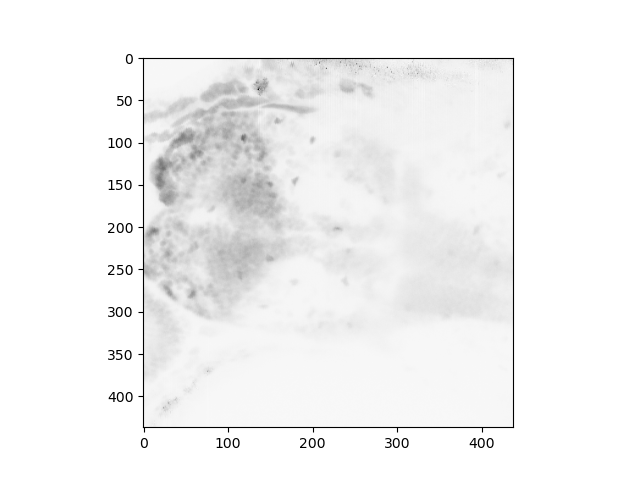

In [88]:
plt.figure()
plt.imshow(imgs_postpost[1],cmap="gray_r")
plt.show()

In [151]:
import seaborn as sns
from scipy.stats import norm
from matplotlib import cm

In [132]:
pb_icxt = norm(0,.2).pdf(np.linspace(norm.ppf(0.01),norm.ppf(0.99),1000))
pb_wcxt = (np.ones(1000)*np.max(pb_icxt))-pb_icxt

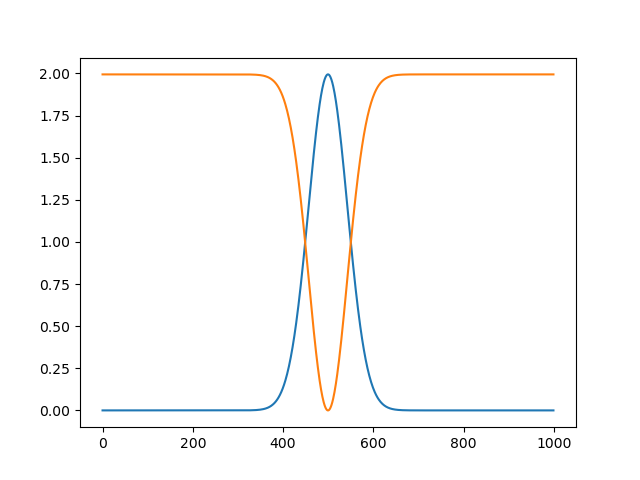

In [133]:
plt.figure()
plt.plot(pb_icxt)
plt.plot(pb_wcxt)
plt.show()

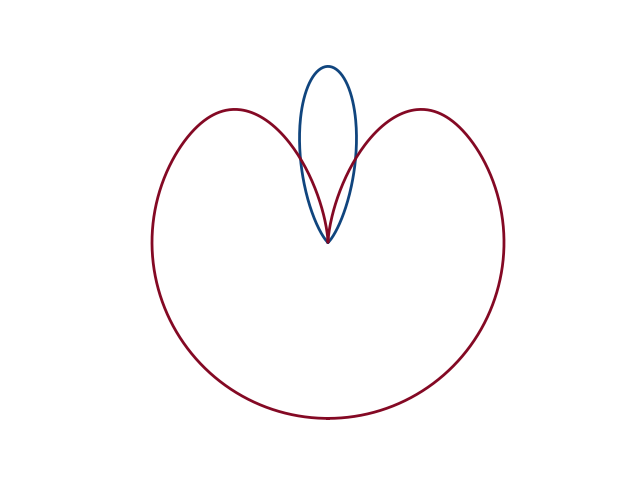

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_yticklabels([])
ax.set_theta_zero_location('S')
ax.plot(np.linspace(0,np.pi*2,1000),pb_icxt,lw=2,c=cm.RdBu(245))
ax.plot(np.linspace(0,np.pi*2,1000),pb_wcxt, lw=2,c=cm.RdBu(10))
ax.axis("off")
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\sketch_tf.png", dpi=800)

In [146]:
pb_l = np.roll(norm(0,.5).pdf(np.linspace(norm.ppf(0.01),norm.ppf(0.99),1000)),-250)
pb_r = np.roll(norm(0,.5).pdf(np.linspace(norm.ppf(0.01),norm.ppf(0.99),1000)),250)

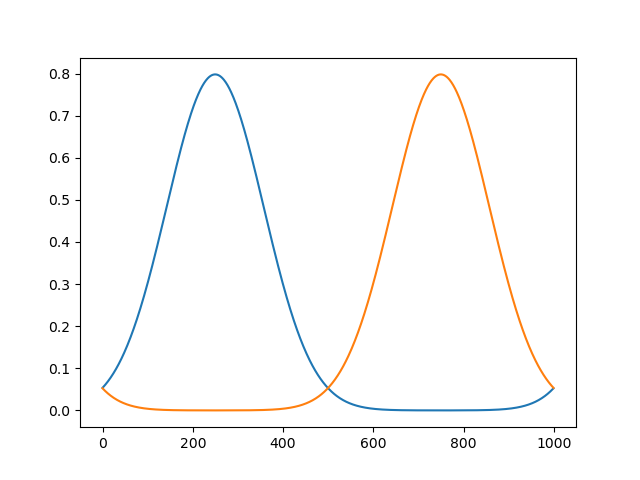

In [147]:
plt.figure()
plt.plot(pb_l)
plt.plot(pb_r)
plt.show()

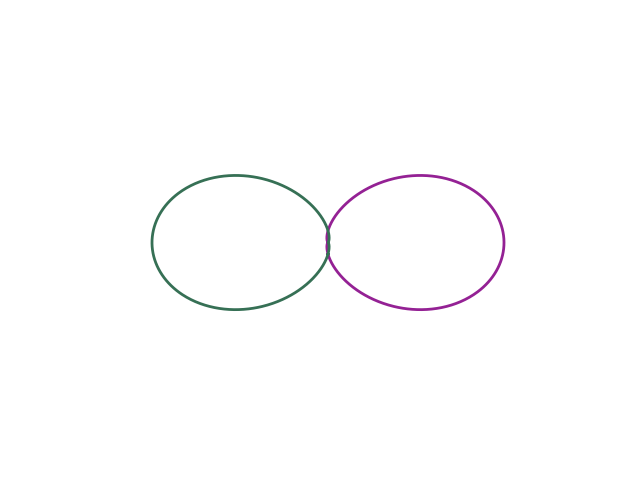

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_yticklabels([])
ax.set_theta_zero_location('S')
ax.plot(np.linspace(0,np.pi*2,1000),pb_l,lw=2,c="#942194")
ax.plot(np.linspace(0,np.pi*2,1000),pb_r, lw=2,c="#367055")
ax.axis("off")
plt.show()
plt.savefig(r"C:\Users\ge59xan\Desktop\new_figs_new\sketch_lr.png", dpi=800)